### Свойство 1: Множество Мандельброта симметрично относительно вещественной оси.

**Доказательство**: Пусть $\( c = x + iy \)$, где $\( x \)$ — вещественная часть, а $\( y \)$ — мнимая часть $\( c \)$. Если последовательность $\( z_{n+1} = z_n^2 + c \)$ ограничена для некоторого $\( c = x + iy \)$, то она будет ограничена и для сопряжённого числа $\( \bar{c} = x - iy \)$. Это объясняется тем, что для любого комплексного числа $\( z = u + iv \)$, где $\( u \)$ и $\( v \)$ — вещественная и мнимая части, верно следующее:

$$\[
\overline{z^2} = (\overline{z})^2.
\]$$

Значит, если для некоторого $\( c \)$ последовательность $\( z_n \)$ остаётся ограниченной, то для сопряжённого $\( \bar{c} \)$ поведение будет таким же. Это подтверждает симметрию множества относительно вещественной оси.

---

### Свойство 2: Если $\( |c| > 2 \)$, то $\( c \)$ не принадлежит множеству Мандельброта.

**Доказательство**: Для $\( z_0 = 0 \)$ и любого $\( c \)$, если $\( |c| > 2 \)$, то при первом же шаге:

$$\[
|z_1| = |z_0^2 + c| = |c| > 2.
\]$$

При следующей итерации значение $\( |z_2| \)$ будет только увеличиваться, поскольку $\( |z_{n+1}| = |z_n^2 + c| \)$, и для $\( |z_n| > 2 \)$, выражение $\( |z_n^2| \)$ будет расти с каждым шагом. Следовательно, если $\( |c| > 2 \)$, то последовательность $\( z_n \)$ убегает на бесконечность, что подтверждает, что такие $\( c \)$ не принадлежат множеству Мандельброта.


In [4]:
!pip3 install numpy
!pip3 install matplotlib

  Using cached numpy-2.1.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.1.2-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl (251 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-macosx_11_0_arm64.whl (2.3 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl (63 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.1 MB/s eta 0:00:00a 0:00:01


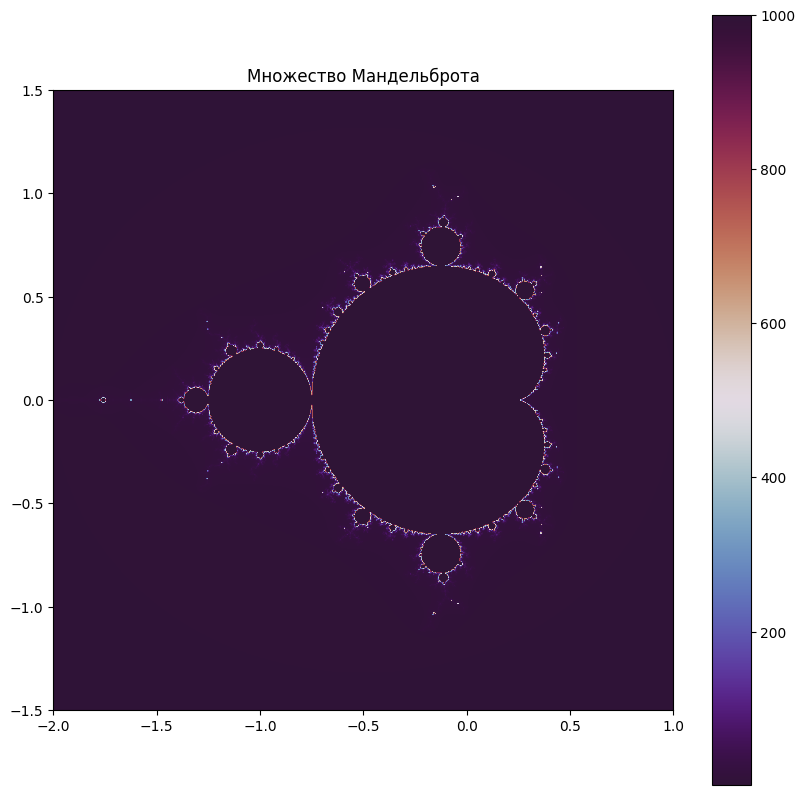

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z**2 + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    mandelbrot_image = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            mandelbrot_image[i, j] = mandelbrot(r1[i] + 1j * r2[j], max_iter)
    return mandelbrot_image

# Параметры для визуализации
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
width, height = 800, 800
max_iter = 1000

mandelbrot_image = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

# Визуализация
plt.figure(figsize=(10, 10))
plt.imshow(mandelbrot_image.T, extent=[xmin, xmax, ymin, ymax], cmap='twilight_shifted')
plt.colorbar()
plt.title("Множество Мандельброта")
plt.show()

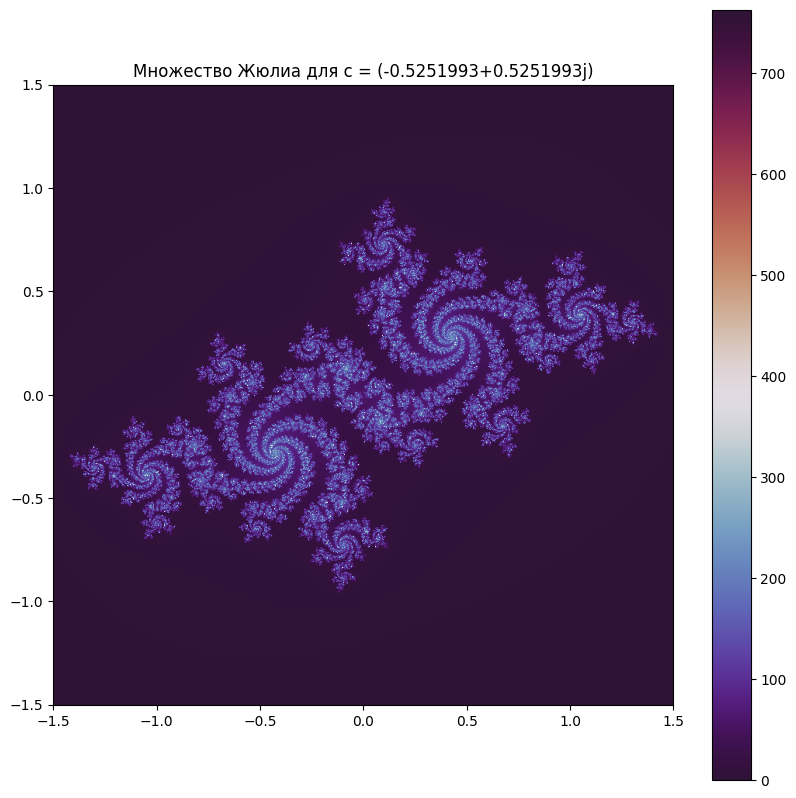

In [10]:
def julia_set(c, xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    julia_image = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            z = r1[i] + 1j * r2[j]
            for k in range(max_iter):
                if abs(z) > 2.0:
                    julia_image[i, j] = k
                    break
                z = z**2 + c
            else:
                julia_image[i, j] = max_iter
    return julia_image

# Параметры для множества Жюлиа
c = -0.5251993 + 0.5251993j
xmin, xmax, ymin, ymax = -1.5, 1.5, -1.5, 1.5
width, height = 800, 800
max_iter = 1000

julia_image = julia_set(c, xmin, xmax, ymin, ymax, width, height, max_iter)

# Визуализация множества Жюлиа
plt.figure(figsize=(10, 10))
plt.imshow(julia_image.T, extent=[xmin, xmax, ymin, ymax], cmap='twilight_shifted')
plt.colorbar()
plt.title(f"Множество Жюлиа для c = {c}")
plt.show()


Фрактал Ньютона для функции $\( f(z) = z^3 - 1 \)$ представляет собой визуальное отображение так называемых **бассейнов притяжения** для корней этого многочлена в комплексной плоскости. Бассейны Ньютона иллюстрируют, к какому из корней сходится начальная точка при применении метода Ньютона. Ниже приведено подробное описание структуры и построения этих бассейнов.

### 1. **Метод Ньютона в Комплексной Плоскости**

Метод Ньютона — итеративный алгоритм для нахождения корней уравнения $\( f(z) = 0 \)$. В комплексной плоскости этот метод определяется следующим образом:

$$\[ z_{n+1} = z_n - \frac{f(z_n)}{f'(z_n)} \]$$

Для функции $\( f(z) = z^3 - 1 \)$ имеем производную $\( f'(z) = 3z^2 \)$. Метод Ньютона начинает с начального приближения $\( z_0 \)$ и последовательно приближает его к одному из трех корней уравнения:

1. $\( z_1 = 1 \)$
2. $\( z_2 = e^{2\pi i /3} = -\frac{1}{2} + i\frac{\sqrt{3}}{2} \)$
3. $\( z_3 = e^{4\pi i /3} = -\frac{1}{2} - i\frac{\sqrt{3}}{2} \)$

### 2. **Бассейны Притяжения**

**Бассейн притяжения** для конкретного корня состоит из всех начальных точек $\( z_0 \)$ в комплексной плоскости, для которых последовательные итерации метода Ньютона сходятся к этому корню. В случае кубического уравнения $\( z^3 - 1 = 0 \)$ существует три таких бассейна, соответствующих трем корням.

### 3. **Структура Бассейнов**

Бассейны притяжения характеризуются следующими особенностями:

- **Границы Бассейнов:** Границы между разными бассейнами часто являются фрактальными линиями, которые демонстрируют сложную, само-подобную структуру. Эти границы отображают начальные точки, для которых метод Ньютона сходится к различным корням в зависимости от малых изменений начального значения.
  
- **Симметрия:** Для функции $\( z^3 - 1 \)$ бассейны обладают трёхлистной (трилинейной) симметрией, соответствующей трём корням. Это связано с равномерным расположением корней на единичной окружности в комплексной плоскости.
  
- **Динамика Сходимости:** Внутри каждого бассейна притяжения точки сходятся к соответствующему корню с различными скоростями. Ближе к центру бассейна точки обычно сходятся быстрее, тогда как ближе к границам — медленнее или вообще могут не сходиться из-за сложной фрактальной структуры.

### 4. **Визуализация Бассейнов Ньютона**

Для визуализации бассейнов притяжения используется цветовая схема, где каждому корню сопоставляется свой цвет. Обычно:

- **Красный цвет** может обозначать сходимость к первому корню $(\( z_1 = 1 \))$.
- **Зелёный цвет** — к второму корню $(\( z_2 = e^{2\pi i /3} \))$.
- **Синий цвет** — к третьему корню $(\( z_3 = e^{4\pi i /3} \))$.

Каждая точка комплексной плоскости окрашивается в цвет соответствующего бассейна. В местах пересечения и границ бассейнов наблюдаются смешанные цвета и сложные узоры, которые отражают фрактальную природу этих границ.

### 5. **Фрактальная Природа Бассейнов**

Фракталы характеризуются самоподобием на разных масштабах, и бассейны Ньютона не исключение. При увеличении масштаба области на границах бассейнов можно обнаружить всё более сложные и детализированные структуры, похожие на исходные формы. Это свойство делает фракталы Ньютона особенно интересными для математиков и художников.

### 6. **Применение и Интересность**

Бассейны Ньютона не только демонстрируют красоту математических структур, но и имеют приложения в различных областях:

- **Компьютерная Графика:** Используются для создания сложных визуальных эффектов и художественных изображений.
- **Динамические Системы:** Помогают понять поведение итеративных алгоритмов в комплексной плоскости.
- **Математическая Теория:** Исследование фрактальных структур и динамики методов численного анализа.




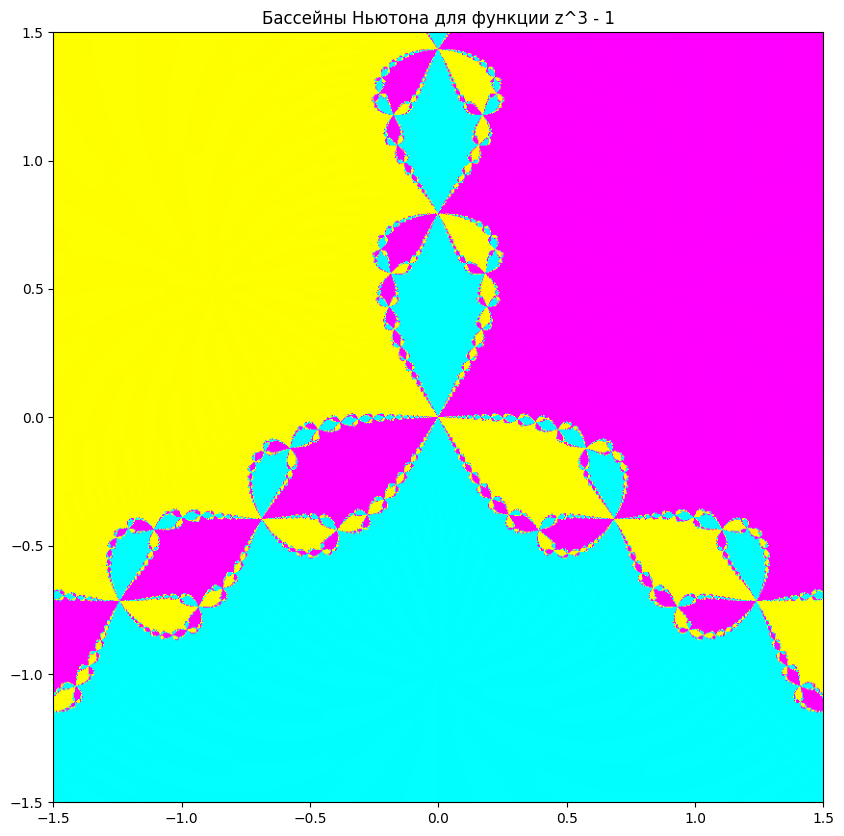

In [7]:
def newton_fractal(xmin, xmax, ymin, ymax, width, height, max_iter):
    def f(z):
        return z**3 - 1

    def f_prime(z):
        return 3 * z**2

    def newton_method(z, max_iter):
        for i in range(max_iter):
            dz = f(z) / f_prime(z)
            if abs(dz) < 1e-6:
                break
            z -= dz
        return z

    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    fractal = np.zeros((width, height, 3))

    roots = [1, np.exp(2j * np.pi / 3), np.exp(4j * np.pi / 3)]
    for i in range(width):
        for j in range(height):
            z = r1[i] + 1j * r2[j]
            root = newton_method(z, max_iter)
            color = [abs(root - r) for r in roots]
            fractal[i, j] = color / np.max(color)

    return fractal

# Параметры
xmin, xmax, ymin, ymax = -1.5, 1.5, -1.5, 1.5
width, height = 800, 800
max_iter = 50

newton_image = newton_fractal(xmin, xmax, ymin, ymax, width, height, max_iter)

# Визуализация бассейнов Ньютона
plt.figure(figsize=(10, 10))
plt.imshow(newton_image, extent=[xmin, xmax, ymin, ymax])
plt.title("Бассейны Ньютона для функции z^3 - 1")
plt.show()
